In [1]:
def isNaN(string):
    return string != string

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
!ls ../data

ParentSample_DR7props.csv           spectra
RQQfigs_DR7.csv                     trainsample_dr7_zlt0.358.csv
speclist_trainsample_dr7_zlt0.6.txt trainsample_dr7_zlt0.6.csv


In [4]:
dat = pd.read_csv("../data/ParentSample_DR7props.csv")
dat.head()

Unnamed: 0 A_morph           SDSS_NAME          RA        DEC  REDSHIFT  \
0           0       D  093509.48+481910.2  143.789520  48.319504    0.2238   
1           1       E  152925.98+021646.6  232.358261   2.279618    0.2634   
2           2       E  144414.66+063306.7  221.061111   6.551877    0.2080   
3           3       E  140808.19+430316.5  212.034164  43.054600    0.2581   
4           4       E  172711.80+632242.1  261.799194  63.378372    0.2174   

   PLATE  FIBER    MJD  TARGET_FLAG_TARGET  ...   logL     i_2   I_2a     R  \
0    834    361  52316                7691  ...  22.92  17.026 -22.73  1.07   
1   2954    379  54561                   3  ...  22.47  17.490 -22.61  0.41   
2   1829    464  53494           135273475  ...  22.47  16.552 -23.04  0.29   
3   1467     48  53115                7171  ...  22.99  16.922 -23.14  0.85   
4    352    639  51789                7168  ...  22.97  16.730 -22.95  0.99   

          LD_cm       Lobs   L_1.4GHz  SFR (Msun/yr)  Separation  SHIFT_OIII  
0  3.434469e+27  22.949804  23.453667     167.694491         0.0   -3.055901  
1  4.120027e+27  22.510854  23.024252      62.388456         0.0  -51.169969  
2  3.160119e+27  22.505157  23.005020      59.685944         0.0   36.020326  
3  4.030828e+27  23.028500  23.540693     204.901363         0.0 -137.892285  
4  3.313937e+27  23.002030  23.504149     188.365559         0.0  -56.434730  

[5 rows x 165 columns]

In [5]:
sdss_names = dat["SDSS_NAME"].values
morph_name = dat["A_morph"].values
#morph_name[isNaN(morph_name)] = "RL"

EW_Halpha = dat["EW_BROAD_HA"].values
EW_OIII5008 = dat["EW_OIII_5007"].values
EW_OIII4960 = dat["EW_OIII_4959"].values
EW_Hbeta = dat["EW_BROAD_HB"].values

voff_Halpha = dat["VOFF_BROAD_HA"].values
voff_OIII5008 = dat["SHIFT_OIII"].values # Trevor's measurement directly from spectra
#voff_OIII4960 = dat["VOFF_OIII_4959"].values
voff_Hbeta = dat["VOFF_BROAD_HB"].values

M = dat["LOGBH_HB_VP06"].values
MI = dat["MI_Z2"].values
L6 = dat["logL"].values

In [6]:
A_morph = {
    "RL": isNaN(dat["A_morph"].values),# & (L6>24),
    #"RI": isNaN(dat["A_morph"].values) & (L6<24),
    "U": dat["A_morph"].values=="U",
    "D": dat["A_morph"].values=="D",
    "E": dat["A_morph"].values=="E",
    "M": dat["A_morph"].values=="M",
    "SR":dat["A_morph"].values=="SR",
    "ND":dat["A_morph"].values=="ND"
}

In [7]:
def plot_corrs(param1, param2):
    fig = plt.figure(figsize=(7,7))
    plt.scatter(param1[A_morph["U"]], param2[A_morph["U"]], label="U")
    plt.scatter(param1[A_morph["ND"]], param2[A_morph["ND"]], label="ND")
    #plt.scatter(param1[A_morph["SR"]], param2[A_morph["SR"]], label="SR")
    plt.scatter(param1[A_morph["D"]], param2[A_morph["D"]], label="D")
    plt.scatter(param1[A_morph["E"]], param2[A_morph["E"]], label="E")
    plt.scatter(param1[A_morph["M"]], param2[A_morph["M"]], label="M")
    plt.scatter(param1[A_morph["RL"]], param2[A_morph["RL"]], color="pink", label="RL")
    plt.xlabel("Param 1")
    plt.ylabel("Param 2")
    plt.legend(loc="best")
    #plt.xlim(7,None)
    #plt.show()

<ipython-input-8-ee6381c58ba6>:1: RuntimeWarning: divide by zero encountered in log10
  plot_corrs(EW_Halpha, np.log10(EW_OIII4960+EW_OIII4960))


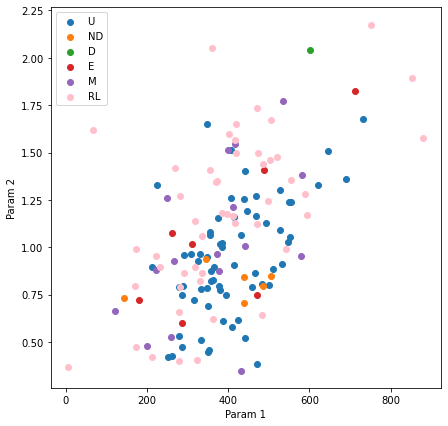

In [8]:
plot_corrs(EW_Halpha, np.log10(EW_OIII4960+EW_OIII4960))

<ipython-input-9-d6b5eac2d60e>:1: RuntimeWarning: invalid value encountered in true_divide
  plot_corrs(M, np.log10((EW_OIII5008+EW_OIII4960)/EW_Hbeta))


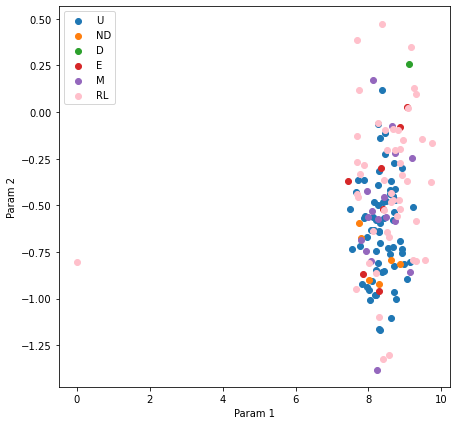

In [9]:
plot_corrs(M, np.log10((EW_OIII5008+EW_OIII4960)/EW_Hbeta))

---

Now create a "property matrix" with properties that seem to make an impact on radio-loudness/jet activity.

In [10]:
ratio = np.log10((EW_OIII5008+EW_OIII4960)/EW_Hbeta)
ratio[np.isnan(ratio)] = 0

X = np.concatenate([ratio, MI, EW_Halpha])

<ipython-input-10-c2ade66b70ec>:1: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.log10((EW_OIII5008+EW_OIII4960)/EW_Hbeta)


In [11]:
X.shape

(534,)

In [12]:
X

array([ 2.57910819e-01, -5.20146752e-01, -3.02332079e-01, -9.58315210e-01,
       -7.82113930e-02, -3.70686199e-01,  2.90467403e-02, -8.70324447e-01,
        1.70942060e-01, -5.62942289e-01, -6.84348729e-01, -4.56633206e-01,
       -1.38033417e+00, -2.16957179e-01, -7.96659353e-01, -5.63303203e-01,
       -2.46947999e-01, -5.29361411e-01, -7.44378390e-01, -7.71170224e-02,
       -8.59153879e-01, -4.21780338e-01, -5.85928886e-01, -5.72176051e-01,
       -5.97119672e-01, -7.92809642e-01, -8.15978304e-01, -9.02064890e-01,
       -9.22769348e-01, -6.75536598e-01, -2.52896643e-01, -5.83284469e-01,
       -1.81323716e+00, -5.26178262e-01, -2.21601276e-01,  1.47443900e-01,
       -9.70623416e-01, -7.63945825e-01, -7.33105890e-01, -1.73119566e-01,
       -7.50269422e-01, -8.87628358e-01, -1.29879650e-01, -8.47257058e-01,
       -4.33894843e-01, -4.69197293e-01, -5.36744847e-02, -1.01150722e-01,
        6.71264549e-02, -8.67289016e-01, -3.55504075e-01, -3.10683214e-04,
       -9.94807670e-01, -

In [13]:
ratio.shape, MI.shape, EW_Halpha.shape

((178,), (178,), (178,))

In [14]:
ratio_norm = (ratio - np.mean(ratio)) / np.std(ratio)
MI_norm = (MI - np.mean(MI)) / np.std(MI)
voff_OIII5008_norm = (voff_OIII5008 - np.mean(voff_OIII5008)) / np.std(voff_OIII5008)
X = np.concatenate((np.array([ratio_norm]).T, np.array([MI_norm]).T, np.array([voff_OIII5008_norm]).T), axis=1)

In [15]:
X

array([[ 2.17227964e+00,  1.27483723e+00, -7.19923357e-02],
       [ 2.29229667e-02,  8.01373972e-01, -4.64471871e-01],
       [ 6.24628341e-01,  5.32421810e-01,  2.46763080e-01],
       [-1.18750199e+00, -2.23626300e-01, -1.17188939e+00],
       [ 1.24375385e+00,  6.42681711e-01, -5.07417960e-01],
       [ 4.35802488e-01,  1.12800320e+00, -7.12765676e-02],
       [ 1.54005067e+00,  9.99575093e-02,  1.35341838e-01],
       [-9.44430600e-01,  1.00339477e+00, -5.20063197e-01],
       [ 1.93203150e+00,  8.73993304e-01,  5.23127328e-02],
       [-9.52981976e-02,  3.30156856e-01, -5.09565264e-01],
       [-4.30679219e-01, -1.13719302e+00, -1.45000687e-01],
       [ 1.98376903e-01, -1.90767754e+00, -5.16245767e-01],
       [-2.35331452e+00, -8.51016604e-01, -6.72760402e-01],
       [ 8.60473498e-01,  1.06115816e+00, -5.38195990e-01],
       [-7.40933368e-01, -1.59518024e-02,  4.34294335e-01],
       [-9.62952107e-02,  5.28189113e-01,  1.55327854e+00],
       [ 7.77624914e-01,  5.51137991e-01

In [16]:
pca = PCA(n_components=2) 
pca.fit(X) 
eigenvalues = pca.transform(X) # compute the eigenvalues of X
mean = pca.mean_ 
eigenvectors = pca.components_ # pca_ncompXwave matrix of components, multiply each by respective eigenvalues to reconstruct spec.

In [17]:
eigenvalues

array([[-2.27134747e+00,  9.80149348e-01],
       [-7.48170193e-01, -4.71251944e-01],
       [-7.02013082e-01,  4.81185134e-01],
       [ 5.42127711e-01, -1.59338538e+00],
       [-1.36707515e+00,  1.88200979e-01],
       [-1.12791396e+00,  3.95377830e-02],
       [-9.52758957e-01,  9.50046178e-01],
       [-3.40561086e-01, -1.07725197e+00],
       [-1.79168261e+00,  1.00043715e+00],
       [-3.36188984e-01, -5.14159060e-01],
       [ 1.07044091e+00, -2.13697617e-01],
       [ 1.17058847e+00, -7.43993189e-02],
       [ 1.84899352e+00, -1.74726874e+00],
       [-1.46263111e+00, -1.01905246e-01],
       [ 5.75844293e-01, -4.97635656e-02],
       [ 1.00486818e-01,  1.15947166e+00],
       [-1.17323164e+00, -5.00056358e-01],
       [-4.97848987e-01, -1.12689923e-01],
       [ 4.45397661e-01, -2.38871210e-01],
       [-3.59859683e-01,  3.71693672e-01],
       [ 3.41663986e-01,  1.31296642e-01],
       [-1.88122571e-01,  3.79786105e-01],
       [-1.08758513e+00, -7.95961096e-01],
       [ 2.

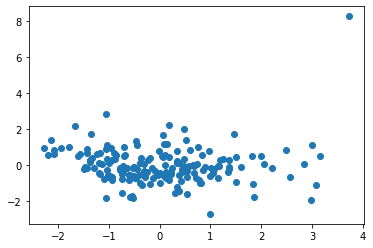

In [18]:
plt.scatter(eigenvalues[:,0], eigenvalues[:,1])

(-3.258497460058622, 2.95)

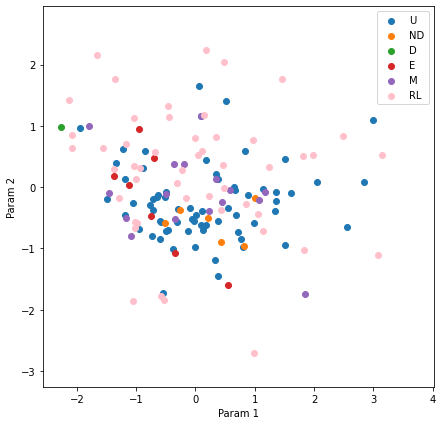

In [19]:
plot_corrs(eigenvalues[:,0], eigenvalues[:,1])
plt.ylim(None,2.95)

Make a Bokeh plot of this, ideally including images and some sort of size scaling based on radio luminosity.

In [20]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource, output_notebook
from bokeh.layouts import gridplot, row
from bokeh.models import HoverTool, markers, glyphs, LinearColorMapper, ColorBar

In [23]:
#Lists of props
colors = []
for i in range(len(dat)):
    if A_morph["U"][i]: colors.append("blue")
    elif A_morph["ND"][i]: colors.append("orange")
    elif A_morph["SR"][i]: colors.append("white")
    elif A_morph["M"][i]: colors.append("purple")
    elif A_morph["E"][i]: colors.append("red")
    elif A_morph["D"][i]: colors.append("green")
    elif A_morph["RL"][i]: colors.append("pink")

#Create the source for bokeh plots - track colors

source = ColumnDataSource(data=dict(  #create source for detections
    EV1 = eigenvalues[:,0],
    EV2 = eigenvalues[:,1],
    name = sdss_names,
    LR = L6,
    Mi = MI,
    sz = ((L6-min(L6))/max(L6))*60 + 1,
    #fill = alphas,
    col = colors
))

hover = HoverTool(names = ["Hover"], tooltips='''
    <div>      
        <div>
            <span style="font-size: 17px; font-weight: bold;">@name</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        
        <div>
            <span style="font-size: 16px; font-weight: bold;">L6 (W/Hz) =</span>
            <span style="font-size: 13px; color: #966;">@LR</span>
        </div>
        
        <div>
            <span style="font-size: 16px; font-weight: bold;">Mi =</span>
            <span style="font-size: 13px; color: #966;">@Mi</span>
        </div>
        
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
        
    </div>


                      ''')

In [26]:
output_file('interactive.html')
output_notebook()

p = figure(plot_width=1000, plot_height=1000, title="",
           x_range=[-2.5, 3.55], y_range = [-2.6, 2.4], tools=[hover, 'pan,box_zoom,wheel_zoom,save,reset,help'])

# create a new plot with the toolbar below
p.circle("EV1", "EV2", color="col", size="sz", source=source, name="Hover")
p.xaxis.axis_label = 'EV1'
p.yaxis.axis_label = 'EV2'

show(p)

Loading BokehJS ...